In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [12]:
from evolvables.expression import ProgramFactory, Program, ProgramCrossoverVariator
from core.evaluator import Evaluator
from core.population import Population
from core.selector import SimpleSelector, Elitist
from core.controller import Controller
from typing import Callable
from evolvables.planewalker import WalkerEvaluator, score_function
import math


def neg(x):
    return -x

def add(x, y):
    return x+y

def sub(x, y):
    return x-y

def mul(x, y):
    return x*y

def div(x, y):
    return 0 if y==0 else x/y

def log(x):
    abs_x = abs(x)
    return 0 if (abs_x == 0) else math.log(abs(x))

def lim(x, a, b):
    return min(max(min(a,b), x), max(a,b))

def avg(x, y):
    return (x+y)/2

def val0():
    return 0

def val1():
    return 1


def himmelblau(x:float, y:float)-> float:
    if x < -5 or x > 5 or y < -5 or y > 5:
        return 1000
    else:
        return (x**2 + y - 11)**2 + (x + y**2 - 7)**2




# ########## Begin setup :) ########## #

# Size of the population. Affects the size of the initial initial population, also enforced by selectors.
pop_size = 200
tree_depth = 4
node_budget = 6
step_bound = 30

sub_episode_bound = 80
sub_step_bound = 30

progf = ProgramFactory((abs, neg, add, sub, mul, div, log, lim, avg, val0, val1), 3)

pops: Population[Program[float]] = Population()
for i in range(0, pop_size):
    pops.append(progf.build(tree_depth, node_budget))

variator = ProgramCrossoverVariator(arity = 2, coarity = 3)

evaluator = WalkerEvaluator(himmelblau, sub_episode_bound, sub_step_bound)

# Prepare the selector.
import gymnasium as gym
selc = Elitist(SimpleSelector[Program[float]](coarity = 2, budget = pop_size))
selp = SimpleSelector[Program[float]](coarity = 2, budget = pop_size)

ctrl = Controller[Program[float]](
    population = pops,
    evaluator = evaluator,
    parent_selector = selc,
    variator = variator,
    survivor_selector = selp
)

best_solutions: list[Program] = []
best_scores: list[Program] = []

def score_keeper(best_scores, best_solutions, c: Controller[Program]):
    best_solutions = best_solutions.append(c.population[0])
    best_scores = best_scores.append(c.population[0].score)

from functools import partial
for i in range(0, step_bound):
    ctrl.step(partial(score_keeper, best_scores, best_solutions))


print ([str(x) for x in best_solutions])
print (str(best_scores))


div(sym_3, lim(avg(sym_2, sym_3), lim(sym_1, sym_3, sym_2), mul(sym_2, val1)))-----avg(log(lim(lim(sym_1, sub(sym_1, val1), lim(val0, sym_1, val1)), sym_3, sym_1)), lim(val1, val0, sym_2))
avg(avg(neg(val1), val0), log(val0))-----lim(div(sub(sub(val1, val0), neg(val1)), val1), val1, sym_3)
log(neg(log(sym_1)))-----log(lim(log(lim(log(val0), lim(val1, sym_2, sym_3), avg(sym_3, sym_2))), log(neg(val1)), lim(sym_2, sym_1, sym_2)))
abs(lim(sym_3, sub(add(val0, val0), sym_2), log(val1)))-----avg(lim(val1, lim(neg(sym_1), lim(val1, sym_2, val0), mul(val0, val1)), lim(val1, val0, val1)), val1)
lim(neg(lim(lim(sym_3, sym_3, sym_2), sym_2, lim(sym_2, val1, val1))), abs(val1), sym_1)-----val1
val1-----lim(neg(sym_2), val1, neg(mul(avg(sym_3, sym_3), sym_3)))
val1-----sub(div(neg(log(val0)), lim(abs(val0), sym_2, log(sym_3))), val1)
val1-----lim(log(sub(sym_3, lim(val1, sym_2, val0))), sym_1, add(val1, val1))
avg(mul(neg(lim(sym_1, sym_2, sym_1)), val0), neg(val1))-----lim(log(val1), lim(sym_1, n

Import

In [18]:
print ([str(x) for x in best_solutions])
print (str(best_scores))

['avg(lim(log(sym_1), sub(neg(sym_1), abs(val0)), val1), val0)', 'avg(lim(sub(neg(sym_1), abs(val0)), log(sym_1), val1), val0)', 'avg(lim(neg(val0), add(sym_2, val0), neg(val1)), val0)', 'avg(lim(neg(val1), lim(val1, val0, log(val0)), add(sym_2, val0)), val0)', 'avg(val0, lim(neg(val1), lim(val1, val0, log(val0)), add(sym_2, val0)))', 'avg(val0, lim(neg(val1), lim(val1, val0, log(val0)), add(sym_2, val0)))', 'avg(lim(log(val0), val1, neg(sym_3)), mul(val0, sub(abs(val0), val0)))', 'avg(lim(lim(log(val0), val1, neg(sym_3)), val1, neg(sym_3)), mul(val0, sub(abs(val0), val0)))', 'sub(lim(neg(val1), lim(sym_1, sym_3, val1), val0), avg(neg(val1), abs(val0)))', 'lim(div(lim(sym_3, lim(val1, mul(sym_2, sym_2), val0), sub(add(val0, val0), sym_2)), div(sub(sub(val1, val0), neg(val1)), val1)), val1, log(sym_1))', 'lim(avg(log(sym_1), val0), sym_1, neg(lim(sym_3, neg(val1), log(sym_3))))', 'mul(lim(lim(val1, sym_1, sym_1), neg(sym_3), lim(log(val0), val1, neg(sym_3))), avg(abs(val0), log(sym_1)))

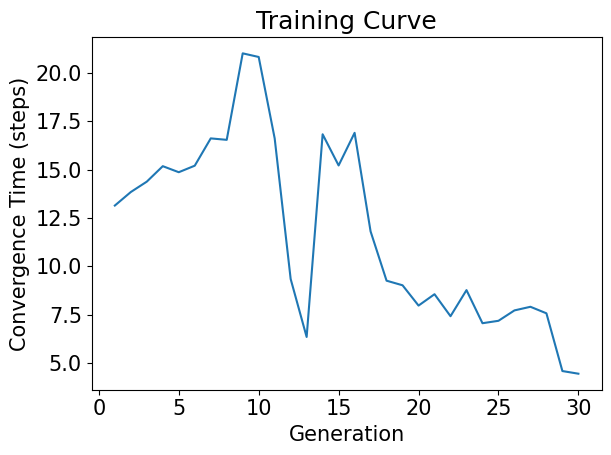

In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {
        'size'   : 15}

matplotlib.rc('font', **font)



exv = best_scores
exv = [-x for x in exv]
ekv = [i+1 for (i,e) in enumerate(exv)]

plt.title("Training Curve")
plt.xlabel("Generation")
plt.ylabel("Convergence Time (steps)")
plt.tight_layout()
plt.plot(ekv, exv)
plt.savefig("test.svg")
plt.show()

In [11]:

[str(x) for x in ctrlx.population]

['lim(sym_2, div(sym_1, sym_3), lim(sym_1, abs(sym_2), log(sym_3)))',
 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), log(sym_3), sym_1))',
 'lim(lim(sub(log(sym_1), val1), log(log(sym_3)), add(val1, log(div(sub(val1, sym_2), lim(sym_3, val1, sym_3))))), log(log(log(sym_3))), val1)',
 'lim(sub(sub(log(sym_1), val1), sym_2), log(log(sym_3)), log(log(log(log(sym_3)))))',
 'lim(add(abs(sym_2), abs(sym_2)), log(log(sym_3)), log(log(div(sub(val1, sym_2), lim(sym_3, val1, sym_3)))))',
 'lim(lim(neg(log(log(sym_3))), log(log(sym_3)), sym_3), log(log(add(val1, val1))), val1)',
 'lim(log(log(log(log(sym_3)))), log(log(sym_3)), log(log(log(sym_3))))',
 'lim(avg(log(val1), val1), log(log(sym_3)), add(lim(val0, log(sym_1), abs(sym_2)), log(log(log(sym_3)))))',
 'lim(add(abs(sym_2), abs(sym_2)), log(log(sym_3)), log(log(div(sub(val1, sym_2), lim(sym_3, val1, sym_3)))))',
 'lim(log(log(sym_3)), add(lim(val0, log(sym_1), abs(sym_2)), log(log(log(sym_3)))), avg(log(val1), val1))',
 'lim(sub(sub(log(sy

In [4]:
['neg(div(abs(sym_2), mul(sym_3, val1)))', 'neg(div(abs(sym_2), mul(sym_3, val1)))', 'neg(div(abs(sym_2), mul(sym_3, val1)))', 'neg(div(abs(sym_2), mul(sym_3, val1)))', 'lim(div(sym_1, sym_3), lim(abs(sym_2), abs(sym_2), val1), sym_2)', 'lim(div(sym_1, sym_3), lim(abs(sym_2), abs(sym_2), val1), sym_2)', 'lim(div(sym_1, sym_3), lim(abs(sym_2), abs(sym_2), mul(sym_3, val1)), sym_2)', 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), abs(sym_2), val1))', 'lim(lim(abs(sym_2), abs(sym_2), mul(sym_3, val1)), div(sym_1, sym_3), sym_2)', 'lim(lim(abs(sym_2), abs(sym_2), mul(sym_3, val1)), div(sym_1, sym_3), sym_2)', 'lim(sym_2, div(sym_1, sym_3), lim(sym_3, abs(sym_2), val1))', 'lim(lim(abs(sym_2), sym_1, abs(sym_2)), div(sym_1, sym_3), sym_2)', 'lim(lim(abs(sym_2), sym_1, abs(sym_2)), div(sym_1, sym_3), sym_2)', 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), sym_1, abs(sym_2)))', 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), sym_1, abs(sym_2)))', 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), sym_1, abs(sym_2)))', 'lim(sym_2, div(sym_1, sym_3), lim(abs(sym_2), sym_1, abs(sym_2)))', 'lim(sym_2, div(sym_1, sym_3), lim(sym_1, abs(sym_2), log(sym_3)))', 'lim(sym_2, div(sym_1, sym_3), lim(sym_1, abs(sym_2), log(sym_3)))', 'lim(sym_2, div(sym_1, sym_3), lim(sym_1, abs(sym_2), log(sym_3)))']
[-17.975, -15.8625, -17.05, -18.5, -14.6, -12.6375, -13.0625, -11.925, -14.025, -14.2375, -14.275, -13.0375, -14.325, -14.6375, -14.3375, -14.875, -14.525, -10.725, -12.0125, -11.6625]

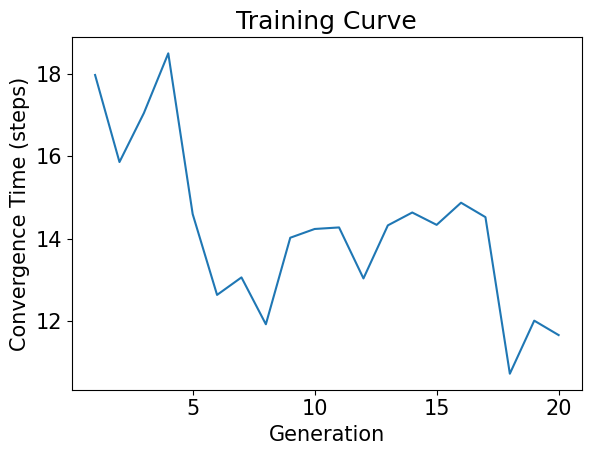

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {
        'size'   : 15}

matplotlib.rc('font', **font)



exv = best_scores
exv = [-x for x in exv]
ekv = [i+1 for (i,e) in enumerate(exv)]

plt.title("Training Curve")
plt.xlabel("Generation")
plt.ylabel("Convergence Time (steps)")
plt.tight_layout()
plt.plot(ekv, exv)
plt.savefig("test.svg")
plt.show()



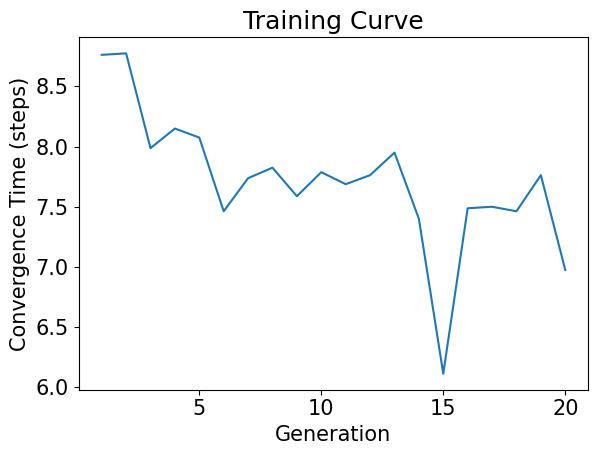

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
font = {
        'size'   : 15}

matplotlib.rc('font', **font)



ex = best_solutions
ex = [-x for x in ex]
ek = [i+1 for (i,e) in enumerate(ex)]

plt.title("Training Curve")
plt.xlabel("Generation")
plt.ylabel("Convergence Time (steps)")
plt.tight_layout()
plt.plot(ek, ex)
plt.savefig("test.svg")
plt.show()

